In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import os

In [2]:
pwd = os.getcwd()+'\\health_data.csv'
dataset = pd.read_csv(pwd)    
dataset = dataset.sample(frac=1)
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1:].values
datasize = X.shape[0]
X_train = X[:(datasize*7)//10,:]
y_train = y[:(datasize*7)//10,:]
X_test = X[(datasize*7)//10:,:]
y_test = y[(datasize*7)//10:,:]


In [38]:
def feature_scaling(X_train,y_train):
    training_size = X_train.shape[0]
    X_mean = np.sum(X_train,axis=0) / training_size
    X_var = np.sqrt(np.sum((np.square(X-X_mean)),axis=0)/training_size)
    X_train_reg = (X_train - X_mean) / X_var
    # y_mean = np.sum(y_train,axis=0) / training_size
    # y_var = np.sqrt(np.sum((np.square(y-y_mean)),axis=0)/training_size)
    # y_train_reg = (y_train - y_mean) / y_var

    # return (X_mean,X_var,X_train_reg,y_mean,y_var,y_train_reg)
    return (X_mean,X_var,X_train_reg)


In [39]:
def parsen_window(X_train,y_train,X_test,y_test,window_size):

    test_size = X_test.shape[0]
    train_size = X_train.shape[0]
    # X_m,X_v,X_r,y_m,y_v,y_r = feature_scaling(X_train,y_train)
    X_m,X_v,X_r = feature_scaling(X_train,y_train)
    X_test_reg = (X_test-X_m)/X_v
    # y_test_reg = (y_test-y_m)/y_v
    y_pred = np.array([])
    # print(y_pred)
    for i in range(test_size):
        sample_X = X_test_reg[i:i+1,:]
        sample_y = y_test[i,:]
        dist_vec = np.sqrt(np.sum(np.square(X_r-sample_X),axis=1))
        dist_vec = dist_vec.reshape((train_size,1))
        # print(dist_vec.shape)
        # print(y_train.shape)
        hyp_cube = y_train[dist_vec[:,0]<=window_size,0]
        num1 = np.sum(hyp_cube,axis=0)
        num0 = hyp_cube.shape[0] - num1
        y_pred = np.append(y_pred,[int(num1>=num0)])
        # print(y_pred)
        # if(y_pred==0):
        #     print('yes')
        # break
    return y_pred
        



In [57]:
def accuracy(y_pred,y_test):

    test_size = y_test.shape[0]

    y_pred = y_pred.reshape((y_pred.shape[0],1))

    print(y_test.shape)
    print(y_pred.shape)

    tp = np.sum((y_pred+y_test)==2 , axis=0)[0]
    tn = np.sum(y_pred==y_test , axis=0)[0] - tp
    fp = np.sum(y_pred , axis=0)[0]-tp
    fn = test_size-tp-tn-fp


    print('tp: {} , tn: {} , fp: {} , fn: {}'.format(tp,tn,fp,fn))

    acc = (tp+tn)/test_size
    if (tp+fp)!=0:
        prec = (tp)/(tp+fp)
    else:
        prec = 0
    if tp+fn==0:
        recl = 0
    else:
        recl = (tp)/(tp+fn)
    if((prec+recl)!=0):
        f1 = 2*prec*recl/(prec+recl)
    else:
        f1 = 0

    print('Accuracy: {}'.format( acc  ))
    print('Precision: {}'.format( prec  ))
    print('Recall: {}'.format( recl  ))
    print('F1 score: {}'.format( f1  ))
    return(f1)

In [58]:
f_list = []
for i in np.arange(0,5,0.1):
    y_pred = parsen_window(X_train,y_train,X_test,y_test,i)
    f1 = accuracy(y_pred,y_test)
    f_list.append(f1)

(210, 1)
(210, 1)
tp: 73 , tn: 1 , fp: 125.0 , fn: 11.0
Accuracy: 0.3523809523809524
Precision: 0.3686868686868687
Recall: 0.8690476190476191
F1 score: 0.5177304964539007
(210, 1)
(210, 1)
tp: 75 , tn: 37 , fp: 89.0 , fn: 9.0
Accuracy: 0.5333333333333333
Precision: 0.4573170731707317
Recall: 0.8928571428571429
F1 score: 0.6048387096774194
(210, 1)
(210, 1)
tp: 76 , tn: 75 , fp: 51.0 , fn: 8.0
Accuracy: 0.719047619047619
Precision: 0.5984251968503937
Recall: 0.9047619047619048
F1 score: 0.7203791469194312
(210, 1)
(210, 1)
tp: 78 , tn: 86 , fp: 40.0 , fn: 6.0
Accuracy: 0.780952380952381
Precision: 0.6610169491525424
Recall: 0.9285714285714286
F1 score: 0.7722772277227723
(210, 1)
(210, 1)
tp: 80 , tn: 90 , fp: 36.0 , fn: 4.0
Accuracy: 0.8095238095238095
Precision: 0.6896551724137931
Recall: 0.9523809523809523
F1 score: 0.7999999999999999
(210, 1)
(210, 1)
tp: 81 , tn: 93 , fp: 33.0 , fn: 3.0
Accuracy: 0.8285714285714286
Precision: 0.7105263157894737
Recall: 0.9642857142857143
F1 score: 

1.9000000000000001
0.8606060606060606


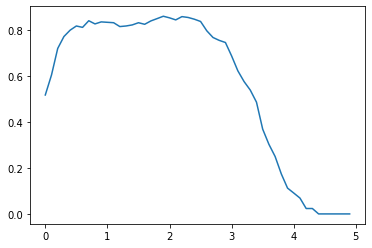

In [60]:
x = 0.1*np.arange(len(f_list))
print(0.1*np.argmax(np.array(f_list)))
print(f_list[np.argmax(np.array(f_list))])
plt.plot(x,f_list)